In [61]:
import numpy as np
import pandas as pd 
import random 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

# Play the Game

In [62]:
def pull_card(score):   
    addition_to_score = 0
    # first what number will the card be? 
    card_number = random.randint(1,10)
    #secondly what colour will the card be? 
    card_colour = np.random.choice(a = ['red', 'black'], p = [1/3, 2/3])
    if card_colour == 'black': 
        addition_to_score += card_number 
    else: 
        addition_to_score -= card_number
    return score + addition_to_score    

In [63]:
def step(action, dealer_card, player_sum): 
    if action == 1: 
        player_sum = pull_card(player_sum)
        if player_sum < 1 or player_sum > 21: 
            return dealer_card, player_sum,'terminal', -1 
        else: 
            # there is no reward yet since dealer has not played
            return dealer_card, player_sum, 'not terminal', 0 
    # else condition if action == stick -> dealer plays -> reward 
    else:
        while dealer_card < 17: 
            dealer_card = pull_card(dealer_card)
            if dealer_card < 1 or dealer_card > 21:
                return dealer_card, player_sum, 'terminal', 1 
        if dealer_card > player_sum: 
            return dealer_card, player_sum, 'terminal', -1
        elif player_sum > dealer_card:
            return dealer_card, player_sum, 'terminal', 1
        else: 
            return dealer_card, player_sum,'terminal', 0
    

# Monte Carlo Control

Sutton and Barto pseudocode: Monte Carlo control with exploring starts:

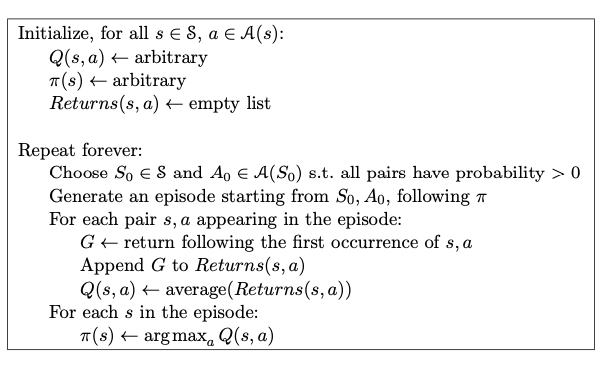

Exploring starts is suitable for Easy21 because the episodes are all simulated games. This means every state can be chosen just by choosing the starting state randomly. 

Building Blocks:  
- Value function:  Q(s,a). This represents what the agent knows about how good an action, a, is when at state s. This will be initialised to zero. 
- Time varying scalar step size - the step size is also called the learning rate. It tells the agent how much to value new information. It is a weight given to the reward the agent would get by taking action a in state s.  
- N(s) - number of times that state s has been visited. 
- N(s,a) number of times that action a has been selected from state s. 
- E-greedy policy:  this defines how the agent will play the game. This greedy policy allows for both exploration and exploitation, weighted by the number of times state s has been visited.   
 

 
Need to represent all possible states and their possible actions. How many possible states are there? This is a combination of the dealer's and player's current position. While the player/agent/bot plays the game the dealer can be in any one of 10 states (i.e. holding a card with a value between 1 and 10) and the player can be in any one of 21 states. Alongside that there are two possible actions associated with each state - hit or stick. 
i.e. 2 x 10 x 21 possible state-action pairs.   

The goal is to move from the policy shown below, where there is a random probability of hit or stick being chosen, to a dataframe with definitive hit or stick policy to maximise reward in each state. 

In [64]:
pd.DataFrame('hit/stick', columns=range(1,11), index = range(1,22))

,1,2,3,4,5,6,7,8,9,10
1,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick
2,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick
3,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick
4,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick
5,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick
6,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick
7,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick
8,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick
9,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick
10,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick,hit/stick


In [65]:
# increasing the dealer card and player sum by one allows for more logical indexing later 
# if we were to look up the state where the dealer had a 10 card, this would be index 9. 
# increasing it by one means that index 0 won't have any information stored in it but with such a small space it won't cause problems
# this doesn't need to be done for the action space because the actions are represented logically as 0, 1. 

# intitalise value function to 0 
Qsa = np.zeros((2,11,22))
# number of times a state has been visited - it doesn't matter what action has been chosen from that state 
Ns = np.zeros((11,22))
# number of times action a has been chosen from state s 
Nsa = np.zeros((2,11,22))

In [66]:
def exploration_greedy(dealer_card, player_sum): 
    # epsilon = 100/(100 + number of times state [player_sum, dealer_card] has been visited)
    e = 100/(100 + Ns[dealer_card, player_sum])
    if np.random.random() < e: 
        # choose randomly next action
        action = np.random.choice([0,1])
    else: 
        # choose greedily next action by looking up the best value in the value function out of the two possible actions
        action = np.argmax(Qsa[action, dealer_card, player_sum] for action in [0,1])
    return action

choosing the first cards is a fully observed random process. This is the beginning of monte carlo control. Then the game is played using the exploration policy defined above - this is a single episode. For each state-action pair encountered in this episode: the number of times the state has been visited is increased by 1, and the number of times that action is chosen from that state is increased by 1. When the game is finished playing with this episode then the reward associated with the terminal state is added to the Qsa value function. The size of this reward is weighted by how many times the state has been visited already. 

In [111]:
def monte_carlo_control(Qsa, Ns, Nsa):
    total_reward = 0
    terminal = 'not terminal'
    visited_states = []
    #initialise by drawing first cards - this is why the exploring starts are assumed to visit all states in this game
    player_sum = random.randint(1,10)
    dealer_card = random.randint(1,10)
    while terminal != 'terminal': 
        # increase the number of visits to this state by 1
        Ns[dealer_card, player_sum] += 1
        # choose action using defined policy 
        action = exploration_greedy(dealer_card, player_sum)
        # increase the number of times this action has been chosen in this state
        Nsa[action, dealer_card, player_sum] += 1 
        # record the states visited 
        visited_states.append([action, dealer_card, player_sum])
        # now the information has been collected from episode starting state it's time to play the game
        dealer_card, player_sum, terminal, reward = list(step(action, dealer_card, player_sum))
        # add the reward to the total reward
        total_reward += reward
    for action, dealer_card, player_sum in visited_states: 
        # could write a function for this 
        # the value function is updated with the reward associated with the states the agent has visited
        # the time varying scalar step weights the reward
        Qsa[action, dealer_card, player_sum] += (1 / Ns[dealer_card, player_sum])*\
        (total_reward - Qsa[action, dealer_card, player_sum])
    # return the updated value function, number of times a state has been visited,
    # number of times an action has been chosen in a state
    return Qsa, Ns, Nsa
    

In [126]:
Qsa = np.zeros((2,11,22))
# number of times a state has been visited - it doesn't matter what action has been chosen from that state 
Ns = np.zeros((11,22))
# number of times action a has been chosen from state s 
Nsa = np.zeros((2,11,22))

In [127]:
for i in range(1000000):
    # run the monte carlo control for a set number of episodes, updating the value function etc as it goes
    Qsa, Ns, Nsa = monte_carlo_control(Qsa, Ns, Nsa)

In [128]:
Qsa

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.32430104,  0.31002817,  0.31559971,
          0.31339003,  0.33133529,  0.33408125,  0.31157297,
          0.3017896 ,  0.31510383,  0.32888738,  0.25459743,
          0.34553805,  0.17183969,  0.34170051,  0.17496859,
          0.08616868,  0.3329289 ,  0.66805246,  0.81303061,
          0.85061106,  0.76470588],
        [ 0.        ,  0.26210967,  0.25077017,  0.26267572,
          0.25554578,  0.25167344,  0.26963894,  0.26282008,
          0.24229925,  0.25741358,  0.26766115,  0.13744542,
          0.42113878,  0.19837489,  0.50285324,  0.18637381,
         -0.09366475,  0.5553049 ,  0.59394287,  0.73924569,
          0.6

In [129]:
# can build a dataframe now with a policy that contains hit or stick recommendations. Start with 'blank' dataframe:
Qdf = pd.DataFrame('hit/stick', columns=range(1,11), index = range(1,22))

In [130]:
# sort squares into hit or stick based on the value function. The action that holds the highest score is better
for dealer_card in range(1,11): 
    for player_sum in range(1,22): 
        if Qsa[0][dealer_card][player_sum] > Qsa[1][dealer_card][player_sum]: 
            Qdf[dealer_card][player_sum] = 'stick'
        elif Qsa[0][dealer_card][player_sum] < Qsa[1][dealer_card][player_sum]: 
            Qdf[dealer_card][player_sum] = 'hit'

In [131]:
Qdf

,1,2,3,4,5,6,7,8,9,10
1,stick,stick,stick,stick,stick,stick,stick,stick,stick,stick
2,stick,stick,stick,stick,stick,stick,stick,stick,stick,stick
3,stick,stick,stick,stick,stick,stick,stick,stick,stick,stick
4,stick,stick,stick,stick,stick,stick,stick,stick,stick,stick
5,stick,stick,stick,stick,stick,stick,stick,stick,stick,stick
6,stick,stick,stick,stick,stick,stick,stick,stick,hit,stick
7,stick,stick,stick,stick,stick,stick,stick,stick,stick,stick
8,stick,stick,hit,stick,stick,stick,stick,stick,stick,stick
9,stick,stick,stick,stick,stick,stick,stick,hit,stick,stick
10,stick,stick,stick,stick,stick,stick,stick,stick,stick,hit


In [132]:
# numpy array with just the rewards associated with the recommended actions found above 
best_Qsa = np.zeros((11,22))
for dealer_card in range(1,11): 
    for player_sum in range(1,22): 
        if Qsa[0][dealer_card][player_sum] > Qsa[1][dealer_card][player_sum]: 
            best_Qsa[dealer_card][player_sum] = Qsa[0][dealer_card][player_sum]
        elif Qsa[0][dealer_card][player_sum] < Qsa[1][dealer_card][player_sum]: 
            best_Qsa[dealer_card][player_sum] = Qsa[1][dealer_card][player_sum]

In [133]:
#tidy up array
best_Qsa = np.delete(best_Qsa, 0, 0)

In [134]:
value_star = np.delete(best_Qsa, 0, 1)

In [135]:
np.shape(value_star)

(10, 21)

https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html

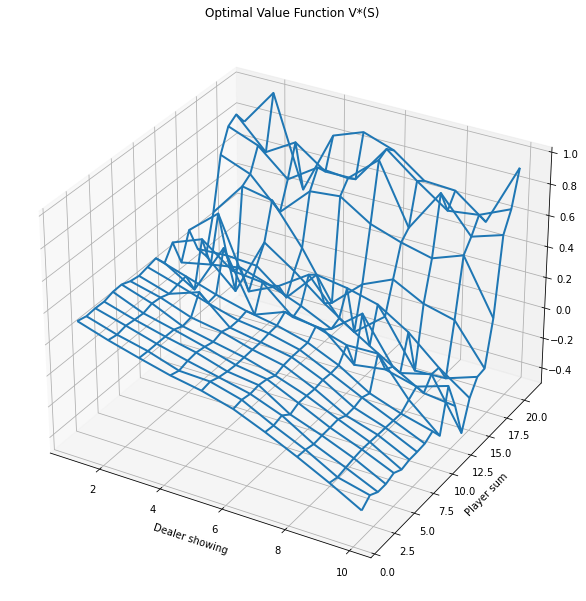

In [139]:
# plot the reward associated with following the optimal policy discovered above 
fig = plt.figure()
ax = plt.axes(projection='3d')
X,Y = np.meshgrid(range(1,11), range(1,22))
ax.plot_wireframe(X,Y, Z = np.transpose(value_star), linewidth=2)

fig.set_size_inches(18.5, 10.5)

plt.xlabel('Dealer showing')
plt.ylabel('Player sum')
plt.title('Optimal Value Function V*(S)')

plt.show()

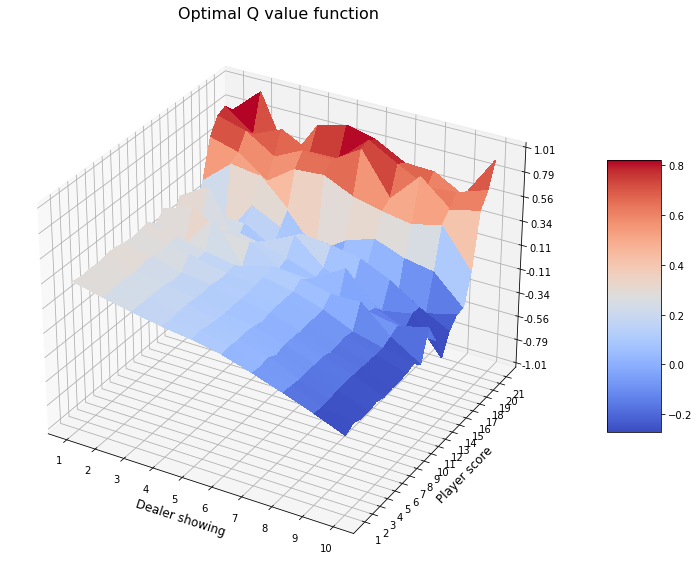

In [148]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

dealer_showing = np.arange(1, 11)
player_score = np.arange(1, 22)
dealer_showing, player_score = np.meshgrid(dealer_showing, player_score)

surf = ax.plot_surface(dealer_showing, player_score, np.transpose(value_star), cmap=cm.coolwarm, linewidth=0,
                       antialiased=False, rstride = 1, cstride = 1)
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


plt.xlabel('Dealer showing', fontsize=12)
plt.ylabel('Player score', fontsize=12)
plt.title('Optimal Q value function', fontsize=16)

plt.xticks(np.arange(1, 11))
plt.yticks(np.arange(1, 22))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Sarsa

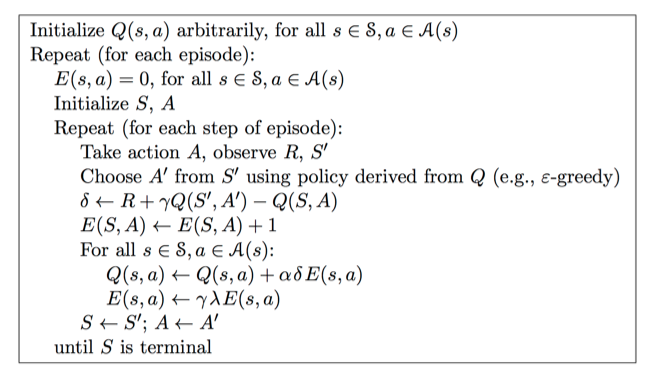

In [78]:
def sarsa(Qsa, Ns, Nsa, Esa, Lambda):
    player_sum = random.randint(1,10)
    dealer_card = random.randint(1,10)
    terminal = 'not terminal'
    while terminal != 'terminal': 
        # increase the number of visits to this state by 1
        Ns[dealer_card, player_sum] += 1
        # choose action using defined policy 
        action = exploration_greedy(dealer_card, player_sum)
        # increase the number of times this action has been chosen in this state
        Nsa[action, dealer_card, player_sum] += 1 
       
        # find the next state in the game 
        dealer_card_prime, player_sum_prime, terminal, reward = list(step(action, dealer_card, player_sum))
        
        # if the game isn't finished delta can be calculated using a combination of [state, action]
        # and [state_prime, action_prime]
        if terminal != 'terminal':
            action_prime = exploration_greedy(dealer_card_prime, player_sum_prime)
            delta = reward + Qsa[action_prime, dealer_card_prime, player_sum_prime] - Qsa[action, dealer_card, player_sum]
        else: 
            # if the game is finished then the 'next' state cannot be used to calculate delta
            delta = reward - Qsa[action, dealer_card, player_sum]
        
        # increase eligibility trace by 1
        Esa[action, dealer_card, player_sum] += 1
        
        # update value function
        Qsa[action, dealer_card, player_sum] += (1/Ns[dealer_card, player_sum]) * delta * Esa[action, dealer_card, player_sum]
        
        # update eligibility trace
        Esa[action, dealer_card, player_sum] = Lambda * Esa[action, dealer_card, player_sum]
        
        # redefine next state as current state 
        player_sum = player_sum_prime
        dealer_sum = dealer_card_prime
        
    return Qsa, Ns, Nsa, Esa
    

### Mean Squared Error against Lambda

In [79]:
mse = []
for Lambda in np.linspace(0,1,11):
    # initalise matrices
    sarsa_Qsa = np.zeros((2,11,22))
    sarsa_Ns = np.zeros((11,22))
    sarsa_Nsa = np.zeros((2,11,22))
    Esa = np.zeros((2,11,22))
    
    # update matrices
    for i in range(1000): 
        sarsa_Qsa, sarsa_Ns, sarsa_Nsa, Esa = sarsa(sarsa_Qsa, sarsa_Ns, sarsa_Nsa, Esa, Lambda)
    
    # calculate mean squared error
    # 2 * 10 * 21 = 420
    mse.append(np.sum(np.square(Qsa - sarsa_Qsa)) / 420)
    

In [80]:
mse

[0.14688970442332383,
 0.14364995190035004,
 0.14544142729556664,
 0.14704777351122092,
 0.15187243638992776,
 0.15055217535504903,
 0.1502156133375821,
 0.16706968659505889,
 0.19487959960839318,
 0.23753091774628526,
 0.33963831491001384]

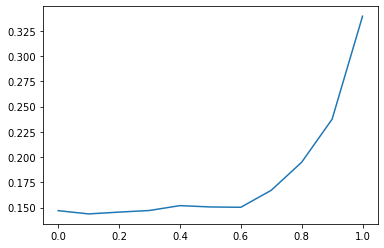

In [81]:
plt.plot(np.linspace(0,1,11), mse)

### Mean Squared Error against Episodes

In [159]:
# plot mean squared error against episodes when lambda = 0 
episodes_mse_zero = []
for i in range(10000): 
    sarsa_Qsa, sarsa_Ns, sarsa_Nsa, Esa = sarsa(sarsa_Qsa, sarsa_Ns, sarsa_Nsa, Esa, Lambda = 0)
    if i % 1000 ==0:
        episodes_mse_zero.append(np.sum(np.square(Qsa - sarsa_Qsa)) / 420)
    

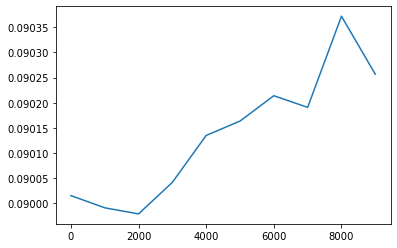

In [160]:
plt.plot(np.arange(10) * 1000, episodes_mse_zero)

In [165]:
# plot mean squared error against episodes when lambda = 1
episodes_mse_one = []
for i in range(100000): 
    sarsa_Qsa, sarsa_Ns, sarsa_Nsa, Esa = sarsa(sarsa_Qsa, sarsa_Ns, sarsa_Nsa, Esa, Lambda = 1)
    if i % 1000 ==0:
        episodes_mse_one.append(np.sum(np.square(Qsa - sarsa_Qsa)) / 420)
    

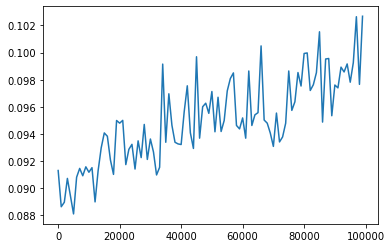

In [166]:
plt.plot(np.arange(100) * 1000, episodes_mse_one)